In [95]:
#Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [96]:
#Name of CSV file
crash_report_file = Path('../Resources/Crash_Reporting_-_Drivers_Data.csv')

In [97]:
#Read CSV
df_crash_report_full = pd.read_csv(crash_report_file)

In [98]:
#Preview full DataFrame
df_crash_report_full.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,01/03/2024 02:55:00 PM,NaN,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,MCP3254003K,230072050,Montgomery County Police,Injury Crash,12/16/2023 12:36:00 PM,Maryland (State),GERMANTOWN RD,County,MIDDLEBROOK RD,NaN,...,35,No,No,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)"
2,EJ7887003Q,230074270,Gaithersburg Police Depar,Injury Crash,12/29/2023 12:00:00 PM,Maryland (State),GREAT SENECA HWY,Municipality,KENTLANDS BLVD,NaN,...,35,No,No,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)"
3,MCP2674004J,230064598,Montgomery County Police,Property Damage Crash,11/05/2023 09:07:00 PM,Maryland (State),WOODFIELD RD,County,GLENDALOUGH RD,NaN,...,40,No,No,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)"
4,MCP25280008,230067019,Montgomery County Police,Property Damage Crash,11/18/2023 12:40:00 AM,Maryland (State),CLARKSBURG RD,Maryland (State),CLARKSBURG RD,NaN,...,20,No,No,2014,NISSAN,ROGUE,NaN,39.228915,-77.289091,"(39.22891483, -77.28909117)"


In [99]:
#narrow down the data
df_injury_vehicle = df_crash_report_full[["Report Number","Injury Severity", "Vehicle Make", "Vehicle Model", "Vehicle Year", "Vehicle Body Type",
                                          "Parked Vehicle", "Vehicle Damage Extent"]]
df_injury_vehicle.head()

,Report Number,Injury Severity,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Body Type,Parked Vehicle,Vehicle Damage Extent
0,MCP3170003V,NO APPARENT INJURY,LEXUS,SUV,2017,PASSENGER CAR,No,FUNCTIONAL
1,MCP3254003K,NO APPARENT INJURY,TOYT,PRIUS,2010,PASSENGER CAR,No,FUNCTIONAL
2,EJ7887003Q,SUSPECTED MINOR INJURY,SUBARU,FORRESTER,2021,(SPORT) UTILITY VEHICLE,No,FUNCTIONAL
3,MCP2674004J,NO APPARENT INJURY,DODGE,CHARGER,2019,POLICE VEHICLE/NON EMERGENCY,No,FUNCTIONAL
4,MCP25280008,NO APPARENT INJURY,NISSAN,ROGUE,2014,PASSENGER CAR,No,DISABLING


In [100]:
#Count number of rows for each variable
df_injury_vehicle.count()

Report Number            172105
Injury Severity          172105
Vehicle Make             172081
Vehicle Model            172039
Vehicle Year             172105
Vehicle Body Type        169456
Parked Vehicle           172105
Vehicle Damage Extent    171789
dtype: int64

In [101]:
#Find the datatypes of each variable
df_injury_vehicle.dtypes

Report Number            object
Injury Severity          object
Vehicle Make             object
Vehicle Model            object
Vehicle Year              int64
Vehicle Body Type        object
Parked Vehicle           object
Vehicle Damage Extent    object
dtype: object

In [102]:
#Count number of instances of each category of injury severity
df_injury_vehicle["Injury Severity"].value_counts()

Injury Severity
NO APPARENT INJURY          141185
POSSIBLE INJURY              17482
SUSPECTED MINOR INJURY       11870
SUSPECTED SERIOUS INJURY      1415
FATAL INJURY                   153
Name: count, dtype: int64

In [103]:
#Count number of instances of each vehicle make
df_injury_vehicle["Vehicle Make"].value_counts()

Vehicle Make
TOYOTA        23171
HONDA         18870
FORD          17138
TOYT           8840
NISSAN         8525
              ...  
FORDD             1
LEIKE             1
TAO               1
VOLKSWGONA        1
HYUNUDAI          1
Name: count, Length: 1877, dtype: int64

In [104]:
#fix TOYOTA
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({'TOYT': "TOYOTA", "TOYTA": "TOYOTA", "TOYTOA": "TOYOTA", 
                                                                               "TOOYOTA": "TOYOTA", "T0YOTA": "TOYOTA", "T0Y0TA": "TOYOTA",
                                                                             "T0YT":"TOYOTA", "T0YOT": "TOYOTA", "TIYITA": "TOYOTA", "TIYOTA": "TOYOTA",
                                                                              "TOOTA": "TOYOTA", "TOOYOTA": "TOYOTA", "TOT":"TOYOTA", "TOTOTA":"TOYOTA",
                                                                              "TOTOYA": "TOYOTA", "TOTOYTA": "TOYOTA", "TOTR": "TOYOTA", "TOTT": "TOYOTA",
                                                                              "TOTY": "TOYOTA", "TOTYOTA": "TOYOTA", "TOY": "TOYOTA", "TOY0AT": "TOYOTA",
                                                                              "TOY0TA": "TOYOTA", "TOYAT": "TOYOTA", "TOYATA": "TOYOTA", "TOYATO":"TOYOTA", 
                                                                              "TOYIOTA": "TOYOTA", "TOYITA": "TOYOTA", "TOYO":"TOYOTA", "TOYOA": "TOYOTA",
                                                                              "TOYOAT": "TOYOTA", "TOYOATA": "TOYOTA", "TOYOOTA": "TOYOTA", "TOYORA": "TOYOTA", 
                                                                              "TOYOT": "TOYOTA", "TOYOTA C": "TOYOTA", "TOYOTA SCION": "TOYOTA", 
                                                                               "TOYOTA/SCION":"TOYOTA", "TOYOTA4": "TOYOTA", "TOYOTA4D": "TOYOTA",
                                                                              "TOYOTAC": "TOYOTA", "TOYOTACE": "TOYOTA", "TOYOTAQ": "TOYOTA", "TOYOTAT":"TOYOTA",
                                                                              "TOYOTAY":"TOYOTA", "TOYOTO": "TOYOTA", "TOYOTOA": "TOYOTA", "TOYOTRA": "TOYOTA",
                                                                              "TOYOTS": "TOYOTA", "TOYOTTA": "TOYOTA", "TOYOTY": "TOYOTA", "TOYOVA": "TOYOTA", 
                                                                              "TOYOVAL1999": "TOYOTA", "TOYOVAL2000": "TOYOTA", "TOYOVAL2002": "TOYOTA",
                                                                              "TOYOVAL2006": "TOYOTA", "TOYOVAL2010": "TOYOTA", "TOYOVAL2011": "TOYOTA", 
                                                                              "TOYOVAL2012": "TOYOTA", "TOYOYA": "TOYOTA", "TOYOYTA": "TOYOTA", "TOYPTA": "TOYOTA",
                                                                              "TOYR": "TOYOTA", "TOYTHIGHLANDER": "TOYOTA", "TOYTOA": "TOYOTA", "TOYTOTA": "TOYOTA",
                                                                              "TOYTQ": "TOYOTA", "TOYYOTA":"TOYOTA", "TPYOTA": "TOYOTA", "TPYPTA": "TOYOTA", 
                                                                               "TPYT":"TOYOTA", "TTOYOTA": "TOYOTA", "TYOT": "TOYOTA", "TYOTA": "TOYOTA"})

In [105]:
#check if TOYOTA was fixed
df_injury_vehicle["Vehicle Make"].value_counts()

Vehicle Make
TOYOTA              32821
HONDA               18870
FORD                17138
NISSAN               8525
HOND                 5765
                    ...  
4S                      1
LEAF                    1
STRA                    1
THOMAS BLUE BIRD        1
HYUNUDAI                1
Name: count, Length: 1805, dtype: int64

In [106]:
#fix ACURA
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"ACARA":"ACURA", "ACC": "ACURA", "ACCU": "ACURA", "ACCURA": "ACURA",
                                                                               "ACUR": "ACURA", "ACRA": "ACURA","ACRUA": "ACURA", "ACUA":"ACURA", "ACUAR": "ACURA",
                                                                               "ACUR":"ACURA", "ACURA MDX": "ACURA", "ACURA STATEFARM": "ACURA", "ACURAMDX": "ACURA",
                                                                               "ACURARDX": "ACURA", "ACURAT": "ACURA", "ACURS": "ACURA", "AUCRA": "ACURA",
                                                                              "CURA":"ACURA"})

In [107]:
#fix AUDI
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"ADUI": "AUDI", "AUDIVAL 2007": "AUDI","AUIDI": "AUDI"})

In [108]:
#fix BMW
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"BM": "BMW","BMMW":"BMW", "BMV": "BMW", "BMW 45": "BMW", "BMX": "BMW",
                                                                              "BW":"BMW", "BWM": "BMW"})

In [109]:
#fix BUICK
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"BU": "BUICK", "BUCK": "BUICK", "BUIC":"BUICK","BUICCK":"BUICK","BUICK L": "BUICK", 
                                                                               "BUICKE": "BUICK", "BUICL": "BUICK", "BUIK": "BUICK"})

In [110]:
#fix CADILLAC
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"CAD":"CADILLAC", "CADALIC": "CADILLAC","CADALLAC": "CADILLAC","CADALLIC": "CADILLAC",
                                                                               "CADDILAC": "CADILLAC", "CADI":"CADILLAC", "CADILAC": "CADILLAC","CADILACC":"CADILLAC",
                                                                               "CADILLA": "CADILLAC", "CADILLIAC": "CADILLAC", "CADILLIC": "CADILLAC"})

In [111]:
#fix CHEVROLET
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"CEHEVROLET": "CHEVROLET","CEHV":"CHEVROLET", "CEHVORLET":"CHEVROLET",
                                                                               "CEHVY":"CHEVROLET", "CERVELO":"CHEVROLET", "CEV":"CHEVROLET", "CEVROLET":"CHEVROLET",
                                                                               "CEVY": "CHEVROLET", "CGEVROLET":"CHEVROLET", "CHAVROLET":"CHEVROLET", "CHE": "CHEVROLET",
                                                                               "CHE VY": "CHEVROLET", "CHECROLET": "CHEVROLET", "CHECY": "CHEVROLET", "CHEROLET":"CHEVROLET",
                                                                               "CHERVEOLET":"CHEVROLET", "CHERVERLET":"CHEVROLET", "CHERVEROLET": "CHEVROLET","CHERVOLET":"CHEVROLET",
                                                                               "CHEV":"CHEVROLET", "CHEV.":"CHEVROLET", "CHEVE":"CHEVROLET", "CHEVELOT": "CHEVROLET","CHEVERLET":"CHEVROLET",
                                                                               "CHEVERLOET":"CHEVROLET","CHEVERLOT": "CHEVROLET","CHEVEROLET":"CHEVROLET","CHEVEROLRT":"CHEVROLET",
                                                                               "CHEVEY":"CHEVROLET", "CHEVOLET":"CHEVROLET", "CHEVORELT":"CHEVROLET", "CHEVORLET":"CHEVROLET",
                                                                               "CHEVOROLET":"CHEVROLET", "CHEVR":"CHEVROLET","CHEVRLOET":"CHEVROLET", "CHEVRO":"CHEVROLET", "CHEVROELT":"CHEVROLET",
                                                                               "CHEVROET":"CHEVROLET","CHEVROLE":"CHEVROLET", "CHEVROLEET":"CHEVROLET", "CHEVROLETE":"CHEVROLET", "CHEVROLETT":"CHEVROLET",
                                                                               "CHEVROLETTE":"CHEVROLET","CHEVROLEY":"CHEVROLET", "CHEVROLT":"CHEVROLET", "CHEVROLTE": "CHEVROLET", "CHEVROLTER":"CHEVROLET",
                                                                               "CHEVROTLET":"CHEVROLET","CHEVU":"CHEVROLET", "CHEVUY":"CHEVROLET", "CHEVVAL 1995": "CHEVROLET", "CHEVVAL2010":"CHEVROLET",
                                                                               "CHEVVAL2013":"CHEVROLET", "CHEVVAL2014":"CHEVROLET", "CHEVY":"CHEVROLET", "CHEVY ?":"CHEVROLET","CHEVY4DR":"CHEVROLET", 
                                                                               "CHEVYROLET":"CHEVROLET", "CHEY":"CHEVROLET", "CHEYV":"CHEVROLET","CHREVROLET":"CHEVROLET", "CHRV":"CHEVROLET", "CHRVROLET":"CHEVROLET",
                                                                               "CHRVY":"CHEVROLET","CHVROLET":"CHEVROLET","CHVY":"CHEVROLET", "CVEVROLET":"CHEVROLET",
                                                                              "GMC/CHEVY":"CHEVROLET"})

In [112]:
#fix CHRYSLER
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"CGHRUSYLER":"CHRYSLER", "CHHRY":"CHRYSLER","CHRISLER":"CHRYSLER",
                                                                               "CHRLSLER":"CHRYSLER","CHRSLER":"CHRYSLER","CHRSYLER":"CHRYSLER",
                                                                               "CHRYESLER":"CHRYSLER", "CHRYLER":"CHRYSLER","CHRYLS":"CHRYSLER",
                                                                               "CHRYLSER":"CHRYSLER","CHRYLSLER":"CHRYSLER", "CHRYS":"CHRYSLER", 
                                                                               "CHRYSELER":"CHRYSLER","CHRYSER":"CHRYSLER", "CHRYSLE":"CHRYSLER", 
                                                                               "CHRYSLERER":"CHRYSLER","CHRYSLEY":"CHRYSLER", "CHRYSLR":"CHRYSLER",
                                                                               "CHRYST":"CHRYSLER", "CHRYSTLER":"CHRYSLER","CHTYS":"CHRYSLER", "CHYR":"CHRYSLER",
                                                                               "CHYRSLER":"CHRYSLER", "CHYSLER":"CHRYSLER", "CRYSTLER":"CHRYSLER", "CYRYSLER":"CHRYSLER"})

In [113]:
#fix DODGE
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"DADGE":"DODGE", "DAODGE":"DODGE","DDOGE":"DODGE", "DIDGE":"DODGE", 
                                                                               "DOAGE":"DODGE", "DOD":"DODGE", "DODDGE":"DODGE", "DODE":"DODGE", 
                                                                               "DODG":"DODGE", "DODG3":"DODGE", "DODGDE":"DODGE", "DODGE RAM":"DODGE",
                                                                               "DODGE SUV":"DODGE", "DODGE'":"DODGE", "DODGEQ":"DODGE", "DODGGE":"DODGE",
                                                                               "DODGVAL2013":"DODGE", "DODOGE":"DODGE", "DOG":"DODGE", "DOGDE":"DODGE",
                                                                               "DOGDGE":"DODGE", "DOGE":"DODGE", "DOIDGE":"DODGE", "DOSGE":"DODGE"})
                                                                               

In [114]:
#fix FORD
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"F0RD":"FORD", "F150":"FORD", "F250":"FORD", "FIRD":"FORD", "FOCUS":"FORD",
                                                                               "FOED":"FORD", "FOORD":"FORD", "FORD'":"FORD", "FORDD":"FORD","FORDE":"FORD",
                                                                               "FORDQ":"FORD", "FORDVAL2007":"FORD","FORDVAL2012":"FORD","FORDVAL2013":"FORD",
                                                                               "FORDVAL2014":"FORD", "FPRD":"FORD"})

In [115]:
#fix GMC
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"GMV":"GMC", "GENERAL MOTORS":"GMC","GENERAL MOTORS CORPO":"GMC", 
                                                                               "GENRAL MOTORS":"GMC"})

In [116]:
#fix HONDA
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"HANDA":"HONDA", "HHONDA":"HONDA", "HIONDA":"HONDA", "HNDA":"HONDA", 
                                                                               "HODA":"HONDA", "HODNA":"HONDA", "HOINDA":"HONDA", "HOMD":"HONDA","HOMDA":"HONDA",
                                                                               "HON DA":"HONDA", "HONA":"HONDA", "HONAD":"HONDA", "HONADA":"HONDA", "HOND":"HONDA",
                                                                               "HONDA'":"HONDA", "HONDA952":"HONDA","HONDAA":"HONDA", "HONDAP":"HONDA", "HONDAQ":"HONDA",
                                                                               "HONDAT":"HONDA", "HONDD":"HONDA", "HONDDA":"HONDA","HONDM":"HONDA", "HONDQ":"HONDA",
                                                                               "HONDRA":"HONDA", "HONDVA":"HONDA","HONDVAL1992":"HONDA", "HONDVAL2000":"HONDA", 
                                                                               "HONDVAL2005":"HONDA", "HONDVAL2006":"HONDA", "HONNDA":"HONDA", "HOONDA":"HONDA", 
                                                                               "HPNDA":"HONDA"})

In [117]:
#fix HYUNDAI
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"HDAIYUN":"HYUNDAI","HHYUNDIA":"HYUNDAI", "HIUNDAI":"HYUNDAI", "HIUNDAY":"HYUNDAI",
                                                                               "HUNDAI":"HYUNDAI", "HUNDAY":"HYUNDAI", "HUNDI":"HYUNDAI", "HUNYDAI":"HYUNDAI",
                                                                               "HUUNDAI":"HYUNDAI", "HUY":"HYUNDAI", "HUYANDAI":"HYUNDAI", "HUYANDI":"HYUNDAI",
                                                                               "HUYN":"HYUNDAI","HUYNDA":"HYUNDAI", "HUYNDAI":"HYUNDAI", "HUYNDIA":"HYUNDAI",
                                                                               "HUYUNDAI":"HYUNDAI", "HY8UNDAI":"HYUNDAI","HYANDAI":"HYUNDAI", "HYANDI":"HYUNDAI",
                                                                               "HYAUNDAI":"HYUNDAI", "HYD":"HYUNDAI", "HYDUNAI":"HYUNDAI", "HYINDAI":"HYUNDAI",
                                                                               "HYND":"HYUNDAI", "HYNDAI":"HYUNDAI", "HYNDI":"HYUNDAI", "HYNDUAI":"HYUNDAI",
                                                                               "HYNUDAI":"HYUNDAI", "HYUANDAI":"HYUNDAI", "HYUANDI":"HYUNDAI", "HYUDAI":"HYUNDAI",
                                                                               "HYUN":"HYUNDAI", "HYUNADAI":"HYUNDAI", "HYUNADI":"HYUNDAI","HYUNAI":"HYUNDAI",
                                                                               "HYUND":"HYUNDAI", "HYUNDA":"HYUNDAI","HYUNDAU":"HYUNDAI", "HYUNDAUI":"HYUNDAI",
                                                                               "HYUNDAY":"HYUNDAI","HYUNDI": "HYUNDAI", "HYUNDIA":"HYUNDAI","HYUNDYA":"HYUNDAI",
                                                                               "HYUNUDAI":"HYUNDAI","HYUNUNDAI":"HYUNDAI","HYUNVAL1999":"HYUNDAI", "HYUNVAL2008":"HYUNDAI",
                                                                               "HYUUD":"HYUNDAI", "HYUUNDAI":"HYUNDAI"})

In [118]:
#fix INFINITI
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"INFI":"INFINITI", "INFIINITY":"INFINITI", "INFIN":"INFINITI","INFINI":"INFINITI",
                                                                               "INFINIT":"INFINITI","INFINITE":"INFINITI", "INFINITIG":"INFINITI",
                                                                               "INFINITIY":"INFINITI", "INFINITU":"INFINITI", "INFINITY":"INFINITI", "INFINTI":"INFINITI",
                                                                               "INFINTY":"INFINITI","INFITY":"INFINITI", "INFIVAL2014":"INFINITI", "INIF":"INFINITI",
                                                                               "INIFINIT":"INFINITI", "INIFINITI":"INFINITI", "INIFINITY":"INFINITI", "ININITY":"INFINITI"})

In [119]:
#fix ISUZU
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"ISU":"ISUZU", "ISUKU":"ISUZU", "ISUSU":"ISUZU", "ISUZ":"ISUZU", "ISUZI":"ISUZU",
                                                                               "ISUZIU":"ISUZU", "IZSU":"ISUZU", "IZUZU":"ISUZU"})

In [120]:
#fix JAGUAR
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"JAG":"JAGUAR", "JAGAUR":"JAGUAR","JAGU":"JAGUAR", "JAGUARS":"JAGUAR",
                                                                               "JAJUAR":"JAGUAR", "JAUG":"JAGUAR"})

In [121]:
#fix JEEP
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"JEDEP":"JEEP", "JEEB":"JEEP", "JEEEP":"JEEP", "JEEF":"JEEP", "JEEK":"JEEP",
                                                                               "JEEO":"JEEP","JEEPGN":"JEEP","JEEPVAL2013":"JEEP", "JEP":"JEEP", "JEPP":"JEEP",
                                                                               "JWWP":"JEEP"})

In [122]:
#fix LAND ROVER
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"L ROVER":"LAND ROVER","LAND":"LAND ROVER", "LAND  ROVER":"LAND ROVER", "LANDOVER":"LAND ROVER",
                                                                               "LANDR":"LAND ROVER","LANDROVER":"LAND ROVER", "LND":"LAND ROVER", 
                                                                               "LNDR":"LAND ROVER", "LNDROVER":"LAND ROVER", "LNDRVR":"LAND ROVER",
                                                                              "RANG":"LAND ROVER","RANG ROVER":"LAND ROVER","RANGE":"LAND ROVER",
                                                                              "RANGE ROGER":"LAND ROVER","RANGE ROVER":"LAND ROVER","RANGER ROVER":"LAND ROVER",
                                                                              "RANGEROVER":"LAND ROVER","RANGROV":"LAND ROVER","RNG RVR":"LAND ROVER"})

In [123]:
#fix LEXUS
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"LECUS":"LEXUS", "LESUX":"LEXUS", "LEX":"LEXUS", "LEXAS":"LEXUS", 
                                                                               "LEXES":"LEXUS", "LEXI":"LEXUS", "LEXIS":"LEXUS", "LEXS":"LEXUS", 
                                                                               "LEXSUS":"LEXUS","LEXU":"LEXUS", "LEXUA":"LEXUS", "LEXUIS":"LEXUS",
                                                                               "LEXUSS":"LEXUS", "LEXUSZ":"LEXUS", "LEXUUS":"LEXUS", "LEXUVAL2012":"LEXUS",
                                                                               "LEXUW":"LEXUS", "LEXUX":"LEXUS", "LEZUS":"LEXUS", "LUXUS":"LEXUS"})

In [124]:
#fix LINCOLN
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"LICOLN":"LINCOLN","LIINCOLN":"LINCOLN","LIN":"LINCOLN", "LINC":"LINCOLN",
                                                                               "LINCCOLN":"LINCOLN","LINCILN":"LINCOLN","LINCLN":"LINCOLN", "LINCOLDN":"LINCOLN",
                                                                               "LINCOLON":"LINCOLN", "LINCON":"LINCOLN", "LINCVAL2001":"LINCOLN", "LINOLM":"LINCOLN"})

In [125]:
#fix MERCEDES
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"M BENZ":"MERCEDES","MBENZ":"MERCEDES", "MECEDES BENZ":"MERCEDES",
                                                                               "MECEDEZ":"MERCEDES","MECREDES":"MERCEDES", "MEDZ":"MERCEDES", "MER BENX":"MERCEDES",
                                                                               "MER-BENZ":"MERCEDES","MERC":"MERCEDES","MERC BENZ":"MERCEDES", "MERC EDES":"MERCEDES", 
                                                                               "MERCADES":"MERCEDES","MERCDES":"MERCEDES", "MERCE":"MERCEDES","MERCED":"MERCEDES",
                                                                               "MERCEDED":"MERCEDES","MERCEDEES":"MERCEDES","MERCEDES BEN":"MERCEDES","MERCEDES BENS":"MERCEDES",
                                                                               "MERCEDES BENZ":"MERCEDES","MERCEDES ENZ":"MERCEDES", "MERCEDES ZBENZ":"MERCEDES", "MERCEDES-BE":"MERCEDES",
                                                                               "MERCEDES-BENZ":"MERCEDES", "MERCEDESS":"MERCEDES", "MERCEDEZ":"MERCEDES", "MERCEDEZ BENS":"MERCEDES", 
                                                                               "MERCEDEZ BENZ":"MERCEDES","MERCEDEZ-BENZ":"MERCEDES", "MERCEDS":"MERCEDES","MERCEDS BENZ":"MERCEDES",
                                                                               "MERCEEDEZ":"MERCEDES","MERCEES":"MERCEDES","MERCENDES":"MERCEDES", "MERCERDEZ":"MERCEDES", "MERCEZ":"MERCEDES",
                                                                               "MERCRDEZ BENZ":"MERCEDES", "MERCZ":"MERCEDES","MERDECES":"MERCEDES","MERDECES-BENZ":"MERCEDES", "MERDEDES":"MERCEDES",
                                                                               "MERECEDES":"MERCEDES","MERECEDEZ":"MERCEDES", "MERS-BENZ":"MERCEDES","MERZ":"MERCEDES","MERZ 4S":"MERCEDES",
                                                                               "MERZ BENZ":"MERCEDES", "MERZEDES":"MERCEDES","MERZEDES BENZ":"MERCEDES", "MERZEDEZ":"MERCEDES", "MEZ":"MERCEDES",
                                                                               "MREZ":"MERCEDES","MRRZ":"MERCEDES"})

In [126]:
#fix MERCURY
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"MECURY":"MERCURY","MERCERY":"MERCURY", "MERCRY":"MERCURY","MUCURY":"MERCURY",
                                                                               "MURCERY":"MERCURY", "MURCURY":"MERCURY"})

In [127]:
#fix MINI COOPER
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"MINI":"MINI COOPER","MINI COOP":"MINI COOPER", "MINICOOPER":"MINI COOPER",
                                                                               "MINIVAL2013":"MINI COOPER","MINNI":"MINI COOPER", "MNI":"MINI COOPER"})

In [128]:
#fix MAZDA
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"MADZ":"MAZDA","MADZA":"MAZDA","MAXDA":"MAZDA","MAZ":"MAZDA","MAZA":"MAZDA",
                                                                               "MAZADA":"MAZDA","MAZD":"MAZDA", "MAZDA 3":"MAZDA","MAZDA 5":"MAZDA",
                                                                               "MAZDZ":"MAZDA","MAZFA":"MAZDA","MOZDA":"MAZDA","MQZDA":"MAZDA","NAZDA":"MAZDA"})

In [129]:
#fix MITSUBISHI
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"MIST":"MITSUBISHI","MISTI":"MITSUBISHI","MISTISBUSH":"MITSUBISHI",
                                                                               "MISTSUBISHI":"MITSUBISHI", "MISTUBISHI":"MITSUBISHI", "MIT":"MITSUBISHI",
                                                                               "MIT SUBISHI":"MITSUBISHI","MITBISHI":"MITSUBISHI","MITBUSHI":"MITSUBISHI",
                                                                               "MITH=SHUBISHI":"MITSUBISHI","MITI":"MITSUBISHI", "MITIS":"MITSUBISHI",
                                                                               "MITISHBI":'MITSUBISHI',"MITISHIBI":"MITSUBISHI","MITISUBISHI":"MITSUBISHI",
                                                                               "MITS":"MITSUBISHI","MITSBSHI":"MITSUBISHI","MITSHBISHI":"MITSUBISHI",
                                                                               "MITSHIBUSHI":"MITSUBISHI","MITSHUBISHI":"MITSUBISHI", "MITSIBISHI":"MITSUBISHI",
                                                                               "MITSIBUISHI":"MITSUBISHI","MITSIBUSHI":"MITSUBISHI","MITSU":"MITSUBISHI", 
                                                                               "MITSUB":"MITSUBISHI","MITSUBHISHI":"MITSUBISHI", "MITSUBI":'MITSUBISHI',
                                                                               "MITSUBICHI":"MITSUBISHI","MITSUBIHSI":"MITSUBISHI", "MITSUBISH":"MITSUBISHI",
                                                                               "MITSUBISI":"MITSUBISHI","MITSUBISSHI":"MITSUBISHI","MITSUBSCHI":'MITSUBISHI',
                                                                               "MITSUBSHI":"MITSUBISHI","MITSUBUSHI":"MITSUBISHI","MITSUNSHI":'MITSUBISHI',
                                                                               "MITT":"MITSUBISHI", "MITTS":"MITSUBISHI","MITUBISHI":'MITSUBISHI',"MITUS":"MITSUBISHI",
                                                                               "MITUSBISHI":'MITSUBISHI',"MITZ":"MITSUBISHI","MITZUBISHI":'MITSUBISHI',"MTIS":"MITSUBISHI",
                                                                               "MTSUBISHI":"MITSUBISHI"})

In [130]:
#fix NISSAN
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"NIISAN":"NISSAN","NIS":"NISSAN","NISAAN":"NISSAN","NISAN":"NISSAN",
                                                                               "NISS":"NISSAN","NISSA":"NISSAN","NISSA N":"NISSAN","NISSAB":"NISSAN",
                                                                               "NISSAM":"NISSAN","NISSAN 4S":"NISSAN","NISSAN DIESEL":"NISSAN",
                                                                               "NISSAN320":"NISSAN","NISSANT":"NISSAN","NISSAS":"NISSAN","NISSASN":"NISSAN",
                                                                               "NISSIA":"NISSAN","NISSIAN":"NISSAN","NISSN":"NISSAN","NISSON":"NISSAN",
                                                                               "NISSSAN":"NISSAN","NISSVAL2007":"NISSAN","NISSVAL2008":"NISSAN",
                                                                               "NSS":"NISSAN", "NSSAN":"NISSAN","MISSAN":"NISSAN"})

In [131]:
#fix PONTIAC
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"PANTIAC":"PONTIAC","POMTIAC":"PONTIAC","PONIAC":"PONTIAC","PONITAC":"PONTIAC",
                                                                               "PONT":"PONTIAC","PONT.":"PONTIAC","PONTAIC":"PONTIAC","PONTIC":"PONTIAC",
                                                                               "POTIAC":"PONTIAC"})

In [132]:
#fix PORSCHE
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"PORCHE":"PORSCHE","PORS":'PORSCHE',"PORSCE":"PORSCHE","PORSCH":"PORSCHE",
                                                                               "PORSE":"PORSCHE", "PORSH":"PORSCHE","PORSHCE":"PORSCHE","PORSHE":"PORSCHE",
                                                                               "POSCH":"PORSCHE"})

In [133]:
#fix SAAB
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"SAA":"SAAB","SABB":"SAAB","SAUB":"SAAB"})

In [134]:
#fix SATURN
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"SAATURN":"SATURN","SATN":"SATURN","SATR":"SATURN","SATRN":"SATURN",
                                                                               "SATRUN":"SATURN", "SATU":"SATURN","SATUR":"SATURN","SATURNN":"SATURN",
                                                                               "STATURN":"SATURN","STRN":"SATURN"})

In [135]:
#fix SCION
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"SCIO":"SCION","SCIOI":"SCION", "SCIONE":"SCION","SION":"SCION"})

In [136]:
#fix SUBARU
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"SABARU":"SUBARU","SABSRU":"SUBARU","SABURU":"SUBARU","SSUBARU":"SUBARU",
                                                                               "SUB":"SUBARU","SUBA":"SUBARU","SUBAR":"SUBARU","SUBARA":"SUBARU", "SUBARBU":"SUBARU",
                                                                               "SUBARE":"SUBARU","SUBARO":"SUBARU","SUBARRU":"SUBARU", "SUBARUR":"SUBARU",
                                                                               "SUBARUUSS":"SUBARU", "SUBARY":"SUBARU", "SUBAVAL1997":"SUBARU", "SUBBARU":"SUBARU",
                                                                               "SUBR":"SUBARU","SUBRA":"SUBARU","SUBRARU":"SUBARU", "SUBRAU":"SUBARU","SUBRU":"SUBARU",
                                                                               "SUBU":"SUBARU","SUBUARU":"SUBARU","SUBUR":"SUBARU","SUBURA":"SUBARU","SUBURAU":"SUBARU",
                                                                               "SUBUREU":"SUBARU", "SUBURU":"SUBARU","SUNARU":"SUBARU", "SURARU":"SUBARU"})

In [137]:
#fix TESLA
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"TELSA":"TESLA","TESL":"TESLA","TESTLA":"TESLA"})

In [138]:
#fix VOLKSWAGEN
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"VOKS":"VOLKSWAGEN","VOKSWAGEN":"VOLKSWAGEN","VOKSWAGON":"VOLKSWAGEN",
                                                                               "VOLK SWAGON":"VOLKSWAGEN","VOLK":'VOLKSWAGEN',"VOLKD":"VOLKSWAGEN",
                                                                               "VOLKESWAGON":"VOLKSWAGEN","VOLKK":"VOLKSWAGEN","VOLKKWAGON":"VOLKSWAGEN",
                                                                               "VOLKS":"VOLKSWAGEN","VOLKS WAGEN":"VOLKSWAGEN", "VOLKS WAGON":"VOLKSWAGEN",
                                                                               "VOLKSAGON":"VOLKSWAGEN","VOLKSAWAGON":"VOLKSWAGEN","VOLKSAWGEN":"VOLKSWAGEN",
                                                                               "VOLKSW":"VOLKSWAGEN","VOLKSWA":"VOLKSWAGEN","VOLKSWAG":"VOLKSWAGEN",
                                                                               "VOLKSWAGAN":"VOLKSWAGEN","VOLKSWAGEB":"VOLKSWAGEN","VOLKSWAGEM":"VOLKSWAGEN",
                                                                               "VOLKSWAGEN2":"VOLKSWAGEN","VOLKSWAGGON":"VOLKSWAGEN","VOLKSWAGKON":"VOLKSWAGEN",
                                                                               "VOLKSWAGN":"VOLKSWAGEN","VOLKSWAGON":"VOLKSWAGEN","VOLKSWAWEN":"VOLKSWAGEN",
                                                                               "VOLKSWGEN":"VOLKSWAGEN","VOLKSWGN":"VOLKSWAGEN","VOLKSWGONA":"VOLKSWAGEN",
                                                                               "VOLKWAGEN":"VOLKSWAGEN","VOLKWAGGON":"VOLKSWAGEN","VOLKWAGON":"VOLKSWAGEN",
                                                                               "VOLKWASGEN":"VOLKSWAGEN","VOLSKWAGON":"VOLKSWAGEN","VOLS":"VOLKSWAGEN",
                                                                               "VOLSWAGAN":"VOLKSWAGEN","VOLSWAGEN":"VOLKSWAGEN","VOLTS":"VOLKSWAGEN",
                                                                               "VOLTSWAGON":"VOLKSWAGEN","WOLKSWAGEN":"VOLKSWAGEN","WOLKSWAGON":"VOLKSWAGEN"})

In [139]:
#fix VOLVO
df_injury_vehicle["Vehicle Make"] = df_injury_vehicle["Vehicle Make"].replace({"VOLCO":"VOLVO","VOLO":"VOLVO","VOLV":"VOLVO","VOLV0":"VOLVO","VOLVA":"VOLVO",
                                                                               "VOLVE":"VOLVO","VOLVO SAB":"VOLVO","VOLVVAL2008":"VOLVO","VOVL":"VOLVO",
                                                                               "VOVLO":"VOLVO","VOVLV":"VOLVO","VOVLVO":"VOLVO"})

In [140]:
df_cleaned = df_injury_vehicle.loc[(df_injury_vehicle["Vehicle Make"] == "ACURA") | (df_injury_vehicle["Vehicle Make"] == "AUDI") | 
                                    (df_injury_vehicle["Vehicle Make"] == "BMW") | (df_injury_vehicle["Vehicle Make"] == "BUICK") |
                                    (df_injury_vehicle["Vehicle Make"] == "CADILLAC")|(df_injury_vehicle["Vehicle Make"] == "CHEVROLET")|
                                    (df_injury_vehicle["Vehicle Make"] == "CHRYSLER")|(df_injury_vehicle["Vehicle Make"] == "DODGE")|
                                    (df_injury_vehicle["Vehicle Make"] == "FORD")|(df_injury_vehicle["Vehicle Make"] =="GMC")|
                                    (df_injury_vehicle["Vehicle Make"] == "HONDA")|(df_injury_vehicle["Vehicle Make"] == "HYUNDAI")|
                                    (df_injury_vehicle["Vehicle Make"] == "INFINITI")|(df_injury_vehicle["Vehicle Make"] == "ISUZU")|
                                    (df_injury_vehicle["Vehicle Make"] == "JAGUAR")|(df_injury_vehicle["Vehicle Make"] == "JEEP")|
                                    (df_injury_vehicle["Vehicle Make"] == "LAND ROVER")|(df_injury_vehicle["Vehicle Make"] == "LEXUS")|
                                    (df_injury_vehicle["Vehicle Make"] == "LINCOLN")|(df_injury_vehicle["Vehicle Make"] == "MERCEDES")|
                                    (df_injury_vehicle["Vehicle Make"] == "MERCURY")|(df_injury_vehicle["Vehicle Make"] == "MINI COOPER")|
                                    (df_injury_vehicle["Vehicle Make"] == "MAZDA")|(df_injury_vehicle["Vehicle Make"] == "MITSUBISHI")|
                                    (df_injury_vehicle["Vehicle Make"] == "NISSAN")|(df_injury_vehicle["Vehicle Make"] == "PONTIAC")|
                                    (df_injury_vehicle["Vehicle Make"] == "PORSCHE")|(df_injury_vehicle["Vehicle Make"] == "SAAB")|
                                    (df_injury_vehicle["Vehicle Make"] == "SATURN")|(df_injury_vehicle["Vehicle Make"] == "SCION")|
                                    (df_injury_vehicle["Vehicle Make"] == "SUBARU")|(df_injury_vehicle["Vehicle Make"] == "TESLA")|
                                    (df_injury_vehicle["Vehicle Make"] == "TOYOTA")|(df_injury_vehicle["Vehicle Make"] == "VOLKSWAGEN")|
                                    (df_injury_vehicle["Vehicle Make"] == "VOLVO")]
df_cleaned.head()

,Report Number,Injury Severity,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Body Type,Parked Vehicle,Vehicle Damage Extent
0,MCP3170003V,NO APPARENT INJURY,LEXUS,SUV,2017,PASSENGER CAR,No,FUNCTIONAL
1,MCP3254003K,NO APPARENT INJURY,TOYOTA,PRIUS,2010,PASSENGER CAR,No,FUNCTIONAL
2,EJ7887003Q,SUSPECTED MINOR INJURY,SUBARU,FORRESTER,2021,(SPORT) UTILITY VEHICLE,No,FUNCTIONAL
3,MCP2674004J,NO APPARENT INJURY,DODGE,CHARGER,2019,POLICE VEHICLE/NON EMERGENCY,No,FUNCTIONAL
4,MCP25280008,NO APPARENT INJURY,NISSAN,ROGUE,2014,PASSENGER CAR,No,DISABLING


In [141]:
#see total count of vehicle makes
df_cleaned["Vehicle Make"].value_counts()

Vehicle Make
TOYOTA         32821
HONDA          24691
FORD           17157
NISSAN         11393
CHEVROLET      10975
HYUNDAI         6425
DODGE           5389
MERCEDES        3908
ACURA           3830
LEXUS           3811
JEEP            3782
BMW             3329
SUBARU          3319
VOLKSWAGEN      3022
MAZDA           2929
GMC             1901
AUDI            1359
INFINITI        1273
VOLVO           1257
CHRYSLER        1082
MITSUBISHI      1062
CADILLAC         956
BUICK            889
LINCOLN          597
SATURN           460
PONTIAC          452
LAND ROVER       429
SCION            428
TESLA            419
MINI COOPER      366
ISUZU            327
MERCURY          286
PORSCHE          257
JAGUAR           206
SAAB             107
Name: count, dtype: int64

In [142]:
#group cleaned data by Injury Severity
df_grouped = df_cleaned.groupby("Injury Severity")

In [143]:
#get counts for vehicle make and injury severity and put them into series
Make_s = df_grouped["Vehicle Make"].value_counts()
Injury_Severity_s = df_cleaned["Injury Severity"].value_counts()

In [144]:
TOYOTA_injury_percentages = []
#calculate percentages of TOYOTA injuries for each injury type
for injury_type in Injury_Severity_s.index:
    TOYOTA_injury_percentages.append(Make_s[injury_type]["TOYOTA"] * 100/ Injury_Severity_s[injury_type])

In [145]:
#calculate expected values based on # of TOYOTA accidents
expected_value_percentage = len(df_cleaned.loc[df_cleaned["Vehicle Make"] == "TOYOTA"])/ len(df_cleaned) * 100
expected_value_TOYOTA = expected_value_percentage * Injury_Severity_s / 100

In [146]:
#calculate observed values
observed_values_TOYOTA = Injury_Severity_s * TOYOTA_injury_percentages / 100

In [147]:
#Perform the chi squared test for TOYOTAS
stats.chisquare(observed_values_TOYOTA, expected_value_TOYOTA)
#the p value is significant - there is a relationship between injury severity and driving a TOYOTA

Power_divergenceResult(statistic=108.35833811123011, pvalue=1.6295249003155002e-22)

In [148]:
HONDA_injury_percentages = []
#calculate percentages of HONDA injuries for each injury type
for injury_type in Injury_Severity_s.index:
    HONDA_injury_percentages.append(Make_s[injury_type]["HONDA"] * 100/ Injury_Severity_s[injury_type])

In [149]:
#calculate expected values based on # of HONDA accidents
expected_value_percentage = len(df_cleaned.loc[df_cleaned["Vehicle Make"] == "HONDA"])/ len(df_cleaned) * 100
expected_value_HONDA = expected_value_percentage * Injury_Severity_s / 100

In [150]:
#calculate observed values
observed_values_HONDA = Injury_Severity_s * HONDA_injury_percentages / 100

In [151]:
#Perform the chi squared test for TOYOTAS
stats.chisquare(observed_values_HONDA, expected_value_HONDA)
#the p value is significant - there is a relationship between injury severity and driving a HONDA

Power_divergenceResult(statistic=112.12297161167035, pvalue=2.5653648695241117e-23)

In [152]:
#dataFrame with only suspected serious and fatal injuries
df_serious_injury = df_cleaned.loc[(df_cleaned["Injury Severity"] == "SUSPECTED SERIOUS INJURY")|(df_cleaned["Injury Severity"] == "FATAL INJURY")]
df_serious_injury.head()

,Report Number,Injury Severity,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Body Type,Parked Vehicle,Vehicle Damage Extent
20,MCP12270021,FATAL INJURY,HYUNDAI,ELANTRA,2009,PASSENGER CAR,No,DESTROYED
169,MCP3267001S,SUSPECTED SERIOUS INJURY,TOYOTA,COROLLA,2012,PASSENGER CAR,No,DESTROYED
659,MCP2535002P,SUSPECTED SERIOUS INJURY,BMW,546,2018,MOTORCYCLE,No,DISABLING
816,MCP0617005B,SUSPECTED SERIOUS INJURY,ACURA,RL,2008,PASSENGER CAR,No,DISABLING
901,MCP26080056,SUSPECTED SERIOUS INJURY,TOYOTA,CAMRY,2016,PASSENGER CAR,No,DISABLING


In [154]:
#Number of vehicles with serious or fatal injuries
s_count_serious_injury = df_serious_injury["Vehicle Make"].value_counts()
s_count_serious_injury

Vehicle Make
HONDA          275
TOYOTA         268
FORD           114
NISSAN          99
CHEVROLET       91
HYUNDAI         42
DODGE           39
VOLKSWAGEN      37
BMW             36
MERCEDES        31
LEXUS           28
JEEP            26
SUBARU          23
MAZDA           23
ACURA           22
INFINITI        19
CADILLAC        18
BUICK           17
AUDI            16
VOLVO           14
GMC             14
CHRYSLER        12
PONTIAC         10
MITSUBISHI       8
LINCOLN          7
SCION            6
JAGUAR           3
MERCURY          3
SATURN           3
ISUZU            3
MINI COOPER      2
TESLA            1
SAAB             1
LAND ROVER       1
PORSCHE          1
Name: count, dtype: int64

In [155]:
#make a dataFrame of vehicle make counts to use in matplotlib
df_count_serious_injury = s_count_serious_injury.reset_index().rename(columns={"index":"Vehicle Make", 0:"count"})
df_count_serious_injury

,Vehicle Make,count
0,HONDA,275
1,TOYOTA,268
2,FORD,114
3,NISSAN,99
4,CHEVROLET,91
5,HYUNDAI,42
6,DODGE,39
7,VOLKSWAGEN,37
8,BMW,36
9,MERCEDES,31


In [164]:
#make a limited dataFrame with just the top 10 vehicle makes
df_count_serious_injury_limited = df_count_serious_injury.loc[(df_count_serious_injury["Vehicle Make"] == "HONDA")|
                                                                (df_count_serious_injury["Vehicle Make"] == "TOYOTA")|
                                                                (df_count_serious_injury["Vehicle Make"] == "FORD")|
                                                                (df_count_serious_injury["Vehicle Make"] == "NISSAN")|
                                                                (df_count_serious_injury["Vehicle Make"] == "HYUNDAI")|
                                                                (df_count_serious_injury["Vehicle Make"] == "DODGE")|
                                                                (df_count_serious_injury["Vehicle Make"] == "VOLKSWAGEN")|
                                                                (df_count_serious_injury["Vehicle Make"] == "BMW")|
                                                                (df_count_serious_injury["Vehicle Make"] == "MERCEDES")|
                                                                (df_count_serious_injury["Vehicle Make"] == "LEXUS")]
df_count_limited_sorted = df_count_serious_injury_limited.sort_values(["count"], ascending = False)
df_count_limited_sorted

,Vehicle Make,count
0,HONDA,275
1,TOYOTA,268
2,FORD,114
3,NISSAN,99
5,HYUNDAI,42
6,DODGE,39
7,VOLKSWAGEN,37
8,BMW,36
9,MERCEDES,31
10,LEXUS,28


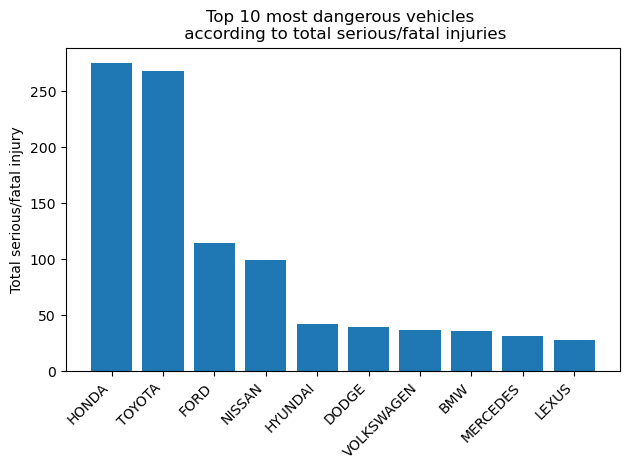

In [182]:
#plot a bar plot with the top 10 greatest counts of serious/fatal injury
plt.bar(df_count_limited_sorted["Vehicle Make"], df_count_limited_sorted["count"], align = "center")
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel("Total serious/fatal injury")
plt.title("Top 10 most dangerous vehicles \n according to total serious/fatal injuries")
plt.tight_layout()
plt.savefig("Images/Total_serious_injuries.png")
plt.show()

In [169]:
#Count of number of vehicles with serious/fatal injuries according to vehicle year
s_year_serious = df_serious_injury["Vehicle Year"].value_counts()
s_year_serious

Vehicle Year
2015    95
2014    84
2016    77
2007    73
2013    72
2005    69
2006    66
2012    62
2003    60
2010    60
2011    59
2009    57
2004    55
2008    51
2018    48
2017    47
2002    42
2019    37
2001    28
2000    25
1999    22
1997    19
2020    18
1998    17
2021    15
1996    11
2023     6
2022     5
1995     5
1993     5
1994     4
1988     3
1991     2
1990     2
1992     2
1989     2
1984     1
1985     1
1978     1
2109     1
1986     1
1976     1
1987     1
2024     1
Name: count, dtype: int64

In [170]:
df_year_serious = s_year_serious.reset_index().rename(columns={"index":"Year", 0:"count"})
df_year_serious

,Vehicle Year,count
0,2015,95
1,2014,84
2,2016,77
3,2007,73
4,2013,72
5,2005,69
6,2006,66
7,2012,62
8,2003,60
9,2010,60


In [173]:
#limit the dataset to top 10 vehicle years that were involved in serious/fatal accidents
df_year_serious_limited = df_year_serious.loc[(df_year_serious["Vehicle Year"] == 2015)|
                                            (df_year_serious["Vehicle Year"] == 2014)|
                                            (df_year_serious["Vehicle Year"] == 2016)|
                                            (df_year_serious["Vehicle Year"] == 2007)|
                                            (df_year_serious["Vehicle Year"] == 2013)|
                                            (df_year_serious["Vehicle Year"] == 2005)|
                                            (df_year_serious["Vehicle Year"] == 2006)|
                                            (df_year_serious["Vehicle Year"] == 2012)|
                                            (df_year_serious["Vehicle Year"] == 2003)|
                                            (df_year_serious["Vehicle Year"] == 2010)]
df_year_limited_sorted = df_year_serious_limited.sort_values(["count"], ascending = False)
df_year_limited_sorted

,Vehicle Year,count
0,2015,95
1,2014,84
2,2016,77
3,2007,73
4,2013,72
5,2005,69
6,2006,66
7,2012,62
8,2003,60
9,2010,60


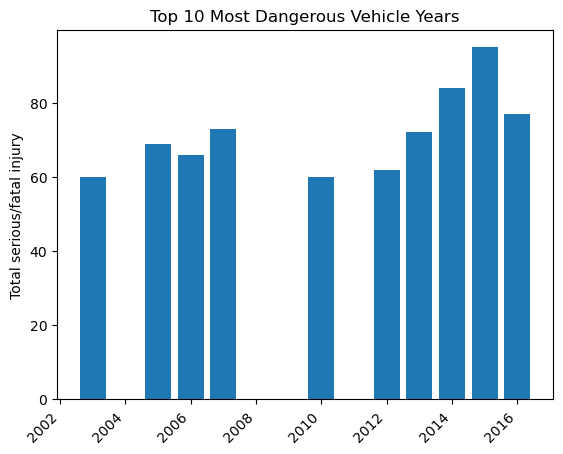

In [175]:
#plot and save a bar plot with the top 10 greatest proportions of serious/fatal injury to total accidents
plt.bar(df_year_limited_sorted["Vehicle Year"], df_year_limited_sorted["count"], align = "center")
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel("Total serious/fatal injury")
plt.title("Top 10 Most Dangerous Vehicle Years")
plt.savefig("Images/Top10_year_serious_injury.png")
plt.show()

In [80]:
#Honda vehicle years for SUSPECTED SERIOUS INJURY or FATAL INJURY dataframe
df_honda_serious_injury = df_serious_injury.loc[df_serious_injury["Vehicle Make"] == "HONDA"]
df_honda_serious_injury["Vehicle Year"].value_counts()
#The most common vehicle year for accidents resulting in serious or fatal injury with Hondas were 2014 and 2015

Vehicle Year
2014    24
2015    20
2006    15
2013    15
2009    14
2004    14
2016    13
2005    13
2007    13
2018    12
2011    11
2003    11
2012    11
2010    11
2008     9
2001     9
1999     7
2017     6
1998     6
2002     6
2019     5
2020     5
1996     5
2000     4
1997     3
2022     3
2021     2
1995     2
1990     1
2023     1
1989     1
1994     1
1991     1
1978     1
Name: count, dtype: int64

In [79]:
#TOYOTA vehicle years for SUSPECTED SERIOUS INJURY or FATAL INJURY dataframe
df_toyota_serious_injury = df_serious_injury.loc[df_serious_injury["Vehicle Make"] == "TOYOTA"]
df_toyota_serious_injury["Vehicle Year"].value_counts()
#the most common vehicle year for accidents resulting in serious or fatal injury with Toyotas were 2016 and 2011

Vehicle Year
2016    23
2011    19
2007    16
2006    15
2014    15
2015    14
2005    14
2012    13
2013    12
2018    12
2009    11
2010    10
2004     9
2008     9
2019     8
1997     8
2003     8
2017     8
2000     8
2020     6
1998     5
2021     4
2002     4
1999     3
1996     3
2001     3
2023     2
1993     2
1992     1
1987     1
1990     1
1991     1
Name: count, dtype: int64